In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/onyxe/Desktop/vector-autoregressive-model-wind/T1totalclean.csv', index_col="timestamp", parse_dates=True)

data.head()

#Make last column to power 
data = data[["windspeed","winddirection","PitchAngle","temperature","power"]]

data.head()
#Nan value yerine mean degeri koy
data = data.fillna(data.mean())   

#Power can not be negative, so make all negative values to zero
data.loc[data['power'] < 0, 'power'] = 0
data["Hour"] = data.index.hour
data["DayOfWeek"] = data.index.dayofweek
data["Month"] = data.index.month
data.head()
data = data.fillna(0)
data.isnull().sum()

#data nin bütün verilerini nümerik hale getir
data = data.apply(pd.to_numeric)
data.head()
#Hout, DayOfWeek, Month kolonlarını float yap
data['Hour'] = data['Hour'].astype(float)
data['DayOfWeek'] = data['DayOfWeek'].astype(float)
data['Month'] = data['Month'].astype(float)
data.dtypes
data.head()

,windspeed,winddirection,PitchAngle,temperature,power,Hour,DayOfWeek,Month
timestamp,,,,,,,,
2019-01-01 00:00:00,5.2,147.600006,-1.8,5.0,180.899994,0.0,1.0,1.0
2019-01-01 00:10:00,5.4,138.600006,-2.1,5.0,213.300003,0.0,1.0,1.0
2019-01-01 00:20:00,5.0,141.500000,-1.7,5.0,164.100006,0.0,1.0,1.0
2019-01-01 00:30:00,3.5,132.000000,0.6,5.0,21.799999,0.0,1.0,1.0
2019-01-01 00:40:00,3.8,136.899994,0.0,5.0,48.299999,0.0,1.0,1.0


In [2]:
new_data = pd.DataFrame(columns=data.columns)
indexList = []
arr =[]
j=0
v= 0
p = 0
while j < len(data):
        for i in data.columns:
                v = 0
                j = p
                if j >= len(data):
                        break
                indexList.append(str(data.index[j].year) + "-" + str(data.index[j].month) + "-" + str(data.index[j].day))
                for k in range(0,144):
                        if j == len(data)-1:
                                arr.append(data[i][j])
                                v+=1
                                
                                sum (arr) /len(arr)
                                new_data.loc[indexList[-1], i] = sum (arr) /len(arr)
                                arr.clear()
                                break
                        if data.index[j].day == data.index[j+1].day:
                                arr.append(data[i][j])
                                j+=1
                                v+=1
                        
                        else:
                                arr.append(data[i][j])
                                
                                v+=1
                                
                                sum (arr) /len(arr)
                                new_data.loc[indexList[-1], i] = sum (arr) /len(arr)
                                arr.clear()
                                break
        p+=v
        print(p, indexList[-1])        

new_data.head()

144 2019-1-1
283 2019-1-2
422 2019-1-3
564 2019-1-4
706 2019-1-5
834 2019-1-6
972 2019-1-7
1096 2019-1-8
1231 2019-1-9
1330 2019-1-10
1474 2019-1-11
1618 2019-1-12
1760 2019-1-13
1903 2019-1-14
2046 2019-1-15
2187 2019-1-16
2328 2019-1-17
2417 2019-1-18
2539 2019-1-19
2683 2019-1-20
2827 2019-1-21
2971 2019-1-22
3115 2019-1-23
3255 2019-1-24
3373 2019-1-25
3517 2019-1-26
3632 2019-1-27
3765 2019-1-28
3908 2019-1-29
4045 2019-1-30
4181 2019-1-31
4313 2019-2-1
4449 2019-2-2
4573 2019-2-3
4717 2019-2-4
4861 2019-2-5
4992 2019-2-6
5128 2019-2-7
5272 2019-2-8
5407 2019-2-9
5522 2019-2-10
5664 2019-2-11
5791 2019-2-12
5933 2019-2-13
6071 2019-2-14
6205 2019-2-15
6348 2019-2-16
6483 2019-2-17
6626 2019-2-18
6769 2019-2-19
6901 2019-2-20
7023 2019-2-21
7145 2019-2-22
7289 2019-2-23
7424 2019-2-24
7566 2019-2-25
7703 2019-2-26
7842 2019-2-27
7984 2019-2-28
8122 2019-3-1
8257 2019-3-2
8382 2019-3-3
8518 2019-3-4
8641 2019-3-5
8767 2019-3-6
8903 2019-3-7
9039 2019-3-8
9182 2019-3-9
9323 2019-3-10

,windspeed,winddirection,PitchAngle,temperature,power,Hour,DayOfWeek,Month
2019-1-1,8.617361,125.489583,-2.3875,4.652778,1237.211805,11.5,1.0,1.0
2019-1-2,8.788489,119.106474,-1.686331,4.928058,1301.99784,11.143885,2.0,1.0
2019-1-3,5.238129,128.441727,3.546763,6.582734,348.120866,11.52518,3.0,1.0
2019-1-4,6.375352,132.757747,-1.049296,8.802817,539.44296,11.415493,4.0,1.0
2019-1-5,7.069014,130.820422,-1.83662,6.802817,655.909859,11.34507,5.0,1.0


In [3]:
new_data.drop(['Hour','DayOfWeek','Month'], axis=1, inplace=True)
new_data.head()

,windspeed,winddirection,PitchAngle,temperature,power
2019-1-1,8.617361,125.489583,-2.3875,4.652778,1237.211805
2019-1-2,8.788489,119.106474,-1.686331,4.928058,1301.99784
2019-1-3,5.238129,128.441727,3.546763,6.582734,348.120866
2019-1-4,6.375352,132.757747,-1.049296,8.802817,539.44296
2019-1-5,7.069014,130.820422,-1.83662,6.802817,655.909859


In [4]:
data = new_data
data = data.fillna(0)
data.isnull().sum()

windspeed        0
winddirection    0
PitchAngle       0
temperature      0
power            0
dtype: int64

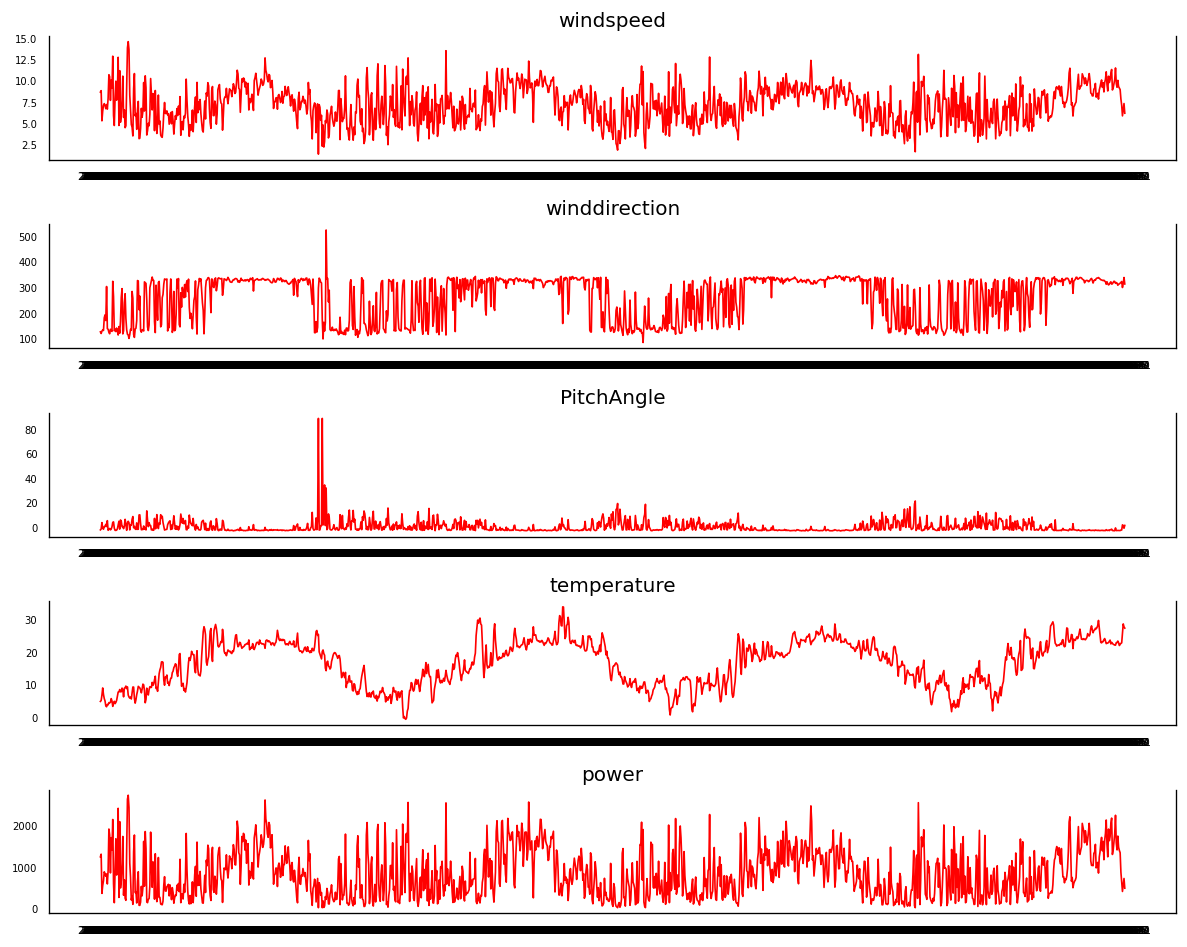

In [5]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    data_temp = data[data.columns[i]]
    ax.plot(data_temp, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [83]:
def min_max_scale(dataframe):
    mm = MinMaxScaler()
    return mm.fit_transform(data)

data = min_max_scale(data)
data = pd.DataFrame(data, columns=new_data.columns , index=new_data.index)

## Train-test split

In [7]:
# train-test split without shuffling
nobs = 6
train, test = data[0:-nobs], data[-nobs:]
X_train, Y_train = train[0:-nobs], train[-nobs:]
print(len(train))
print(len(test))
print(len(X_train))
print(len(Y_train))

1320
6
1314
6


## Stationarity check

In [8]:
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [9]:
print('Augmented Dickey-Fuller Test: power')
augmented_dickey_fuller_statistics(X_train['power'])

Augmented Dickey-Fuller Test: power
ADF Statistic: -3.950994
p-value: 0.001690
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## Order selection

In [10]:
model = VAR(X_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -27.026274476057452
BIC :  -26.90791796712441
FPE :  1.8307888837075464e-12
HQIC:  -26.981888682539868 

Lag Order = 2
AIC :  -27.134029294177026
BIC :  -26.916908914357876
FPE :  1.6437723048611356e-12
HQIC:  -27.05260221377525 

Lag Order = 3
AIC :  -27.183216406772132
BIC :  -26.867210580150395
FPE :  1.5648825435203368e-12
HQIC:  -27.064699636834646 

Lag Order = 4
AIC :  -27.183988678560972
BIC :  -26.768975584133113
FPE :  1.5636864948011482e-12
HQIC:  -27.02833371617092 

Lag Order = 5
AIC :  -27.502027032522147
BIC :  -26.98788460351658
FPE :  1.1377131171071902e-12
HQIC:  -27.309185274214197 

Lag Order = 6
AIC :  -27.533425006540806
BIC :  -26.920030929734494
FPE :  1.1025663407858535e-12
HQIC:  -27.303347748016993 

Lag Order = 7
AIC :  -27.52624954358312
BIC :  -26.81348125861574
FPE :  1.1105343103946315e-12
HQIC:  -27.258887979427694 

Lag Order = 8
AIC :  -27.519628578600848
BIC :  -26.70736327728656
FPE :  1.1179489727023587e-12
HQIC:  -27.214933801

C:\Users\onyxe\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


By AIC, we choose lag 6.

## Train the model

In [11]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Jul, 2023
Time:                     13:37:35
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -26.9200
Nobs:                     1308.00    HQIC:                  -27.3033
Log likelihood:           8882.00    FPE:                1.10257e-12
AIC:                     -27.5334    Det(Omega_mle):     9.80710e-13
--------------------------------------------------------------------
Results for equation windspeed
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.296156         0.060695            4.879           0.000
L1.windspeed             0.054974         0.153003            0.359           0.719
L1.winddirection        -0.091891         0.

## Check for serial correlation of residuals

In [12]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

windspeed : 2.01
winddirection : 2.01
PitchAngle : 2.0
temperature : 1.99
power : 2.01


## Forecast

In [13]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train.values[-lag_order:]
forecast_input

6


array([[0.62752498, 0.5326429 , 0.00289879, 0.68143488, 0.57620958],
       [0.59429288, 0.52771315, 0.00396877, 0.68143488, 0.51383178],
       [0.65566464, 0.5090972 , 0.004075  , 0.69548923, 0.63678799],
       [0.6006453 , 0.51806155, 0.00379423, 0.68143488, 0.53756091],
       [0.58624983, 0.52112684, 0.00260475, 0.65610617, 0.50866062],
       [0.57339813, 0.52802106, 0.00309609, 0.66657743, 0.48922566]])

In [14]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
var_forecast = pd.DataFrame(fc, index=data.index[-nobs:], columns=data.columns)
var_forecast.columns = [str(col) + '_var_forecast' for col in var_forecast.columns]
var_forecast

,windspeed_var_forecast,winddirection_var_forecast,PitchAngle_var_forecast,temperature_var_forecast,power_var_forecast
2022-8-26,0.562234,0.534792,0.009513,0.675765,0.473174
2022-8-27,0.564745,0.544292,0.002202,0.677315,0.472157
2022-8-28,0.568809,0.538412,0.002122,0.682110,0.477126
2022-8-29,0.555566,0.531740,0.007474,0.684096,0.459891
2022-8-30,0.548796,0.534662,0.007677,0.683792,0.449285
2022-8-31,0.544419,0.536103,0.010947,0.683391,0.442581


In [15]:
data[-8:]

,windspeed,winddirection,PitchAngle,temperature,power
2022-8-24,0.586250,0.521127,0.002605,0.656106,0.508661
2022-8-25,0.573398,0.528021,0.003096,0.666577,0.489226
2022-8-26,0.489084,0.533481,0.007156,0.675010,0.314622
2022-8-27,0.435010,0.542236,0.007877,0.679226,0.233276
2022-8-28,0.339774,0.489006,0.053728,0.766009,0.144492
2022-8-29,0.393052,0.524663,0.048316,0.848240,0.205295
2022-8-30,0.449732,0.578042,0.023701,0.821664,0.259912
2022-8-31,0.363379,0.520267,0.048689,0.810729,0.173520


## Evaluation

In [16]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mse = np.mean((forecast - actual)**2)       # MSE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax, 'mse': mse})

print('Forecast Accuracy of: power with VAR')
accuracy_prod = forecast_accuracy(var_forecast['power_var_forecast'].values, test['power'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: power with VAR
mape :  1.2249
me :  0.2405
mae :  0.2405
mpe :  1.2249
rmse :  0.247
corr :  0.109
minmax :  0.5202
mse :  0.061


C:\Users\onyxe\AppData\Local\Temp\ipykernel_37260\4047792176.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\onyxe\AppData\Local\Temp\ipykernel_37260\4047792176.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


# Machine learning models

## Train-validation-test split

In [17]:
n_steps = 10
n_valid = 16
n = data.shape[0]
d = data.shape[1]
n_train = n - nobs - n_valid

In [18]:
test = data[-nobs-n_steps:]
valid = data[-n_steps-n_valid-nobs:-nobs]
train = data[:n_train]

## Splitting into subsequences

In [19]:
# Split train set into subsequences
X_train = np.empty((n_train - n_steps - nobs, n_steps, d))
Y_train = np.empty((n_train - n_steps - nobs, n_steps, d * nobs))
for i in range(n_train - n_steps - nobs):
    X_train[i, :, :] = train[i : i+n_steps]
    for j in range(nobs):
        Y_train[i, :, j*d:(j+1)*d] = train[i+j+1 : i+j+n_steps+1]

In [20]:
X_train.shape, Y_train.shape

((1288, 10, 5), (1288, 10, 30))

In [21]:
# Split validation set into subsequences
X_valid = np.empty((n_valid - nobs, n_steps, d))
Y_valid = np.empty((n_valid - nobs, n_steps, d * nobs))
for i in range(n_valid - nobs):
    X_valid[i, :, :] = valid[i : i+n_steps]
    for j in range(nobs):
        Y_valid[i, :, j*d:(j+1)*d] = valid[i+j+1 : i+j+n_steps+1]

In [22]:
X_valid.shape, Y_valid.shape

((10, 10, 5), (10, 10, 30))

In [23]:
# Split test set into subsequences
X_test = np.array(data[-nobs-n_steps:-nobs])
Y_test = np.empty((n_steps, d * nobs))
for j in range(nobs):
    Y_test[:, j*d : (j+1)*d] = test[j+1 : j+n_steps+1]

In [24]:
X_test.shape, Y_test.shape

((10, 5), (10, 30))

In [25]:
X_test = X_test.reshape(1, n_steps, d)
Y_test = Y_test.reshape(1, n_steps, d * nobs)

In [26]:
X_test.shape, Y_test.shape

((1, 10, 5), (1, 10, 30))

## Normalization

In [27]:
X_min = X_train.min(axis=(0, 1), keepdims=True)
X_max = X_train.max(axis=(0, 1), keepdims=True)
X_train_norm = (X_train - X_min)/(X_max - X_min)

In [28]:
Y_min = Y_train.min(axis=(0, 1), keepdims=True)
Y_max = Y_train.max(axis=(0, 1), keepdims=True)
Y_train_norm = (Y_train - Y_min)/(Y_max - Y_min)

In [29]:
X_valid_norm = (X_valid - X_min)/(X_max - X_min)
Y_valid_norm = (Y_valid - Y_valid)/(Y_max - Y_min)

## Hyperparameter tuning for the RNN model

In [30]:
def build_model(n_hidden=1, n_neurons=20, learning_rate=3e-3, input_shape=[None, 5]):
    model = keras.models.Sequential()
    model.add(keras.layers.SimpleRNN(n_neurons, return_sequences = True, input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.SimpleRNN(n_neurons, return_sequences = True))
    model.add(keras.layers.TimeDistributed(keras.layers.Dense(d*nobs)))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [31]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\onyxe\AppData\Local\Temp\ipykernel_37260\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [32]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(2, 10, 2).tolist(),
    "learning_rate":[0.001, 0.003, 0.05]
}

In [33]:
from sklearn.model_selection import ParameterGrid

best_score = -np.inf
for g in ParameterGrid(param_distribs):
    keras_reg.set_params(**g)
    keras_reg.fit(X_train_norm, Y_train_norm, epochs=1)
    # save if best
    mse_valid = keras_reg.score(X_valid_norm, Y_valid_norm)
    if mse_valid > best_score:
        best_score = mse_valid
        best_grid = g

1/1 [==============================] - 0s 481ms/step - loss: 0.3113


In [34]:
best_grid

{'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 2}

### Select number of time steps

In [35]:
best_score = -np.inf
best_timesteps = 5

timesteps_grid = np.arange(1, 20, 2)

for n_steps in timesteps_grid:
    
    # Train-validation-test split
    test = data[-nobs-n_steps:]
    valid = data[-n_steps-n_valid-nobs:-nobs]
    train = data[:n_train]
    
    # Split train set into subsequences
    X_train = np.empty((n_train - n_steps - nobs, n_steps, d))
    Y_train = np.empty((n_train - n_steps - nobs, n_steps, d * nobs))
    for i in range(n_train - n_steps - nobs):
        X_train[i, :, :] = train[i : i+n_steps]
        for j in range(nobs):
            Y_train[i, :, j*d:(j+1)*d] = train[i+j+1 : i+j+n_steps+1]
    
    # Split validation set into subsequences
    X_valid = np.empty((n_valid - nobs, n_steps, d))
    Y_valid = np.empty((n_valid - nobs, n_steps, d * nobs))
    for i in range(n_valid - nobs):
        X_valid[i, :, :] = valid[i : i+n_steps]
        for j in range(nobs):
            Y_valid[i, :, j*d:(j+1)*d] = valid[i+j+1 : i+j+n_steps+1]
    
    # Normalization
    X_min = X_train.min(axis=(0, 1), keepdims=True)
    X_max = X_train.max(axis=(0, 1), keepdims=True)
    X_train_norm = (X_train - X_min)/(X_max - X_min)
    
    Y_min = Y_train.min(axis=(0, 1), keepdims=True)
    Y_max = Y_train.max(axis=(0, 1), keepdims=True)
    Y_train_norm = (Y_train - Y_min)/(Y_max - Y_min)
    
    X_valid_norm = (X_valid - X_min)/(X_max - X_min)
    Y_valid_norm = (Y_valid - Y_valid)/(Y_max - Y_min)
    
    # fit
    keras_reg.set_params(**best_grid)
    keras_reg.fit(X_train_norm, Y_train_norm, epochs=1)
    # save if best
    mse_valid = keras_reg.score(X_valid_norm, Y_valid_norm)
    if mse_valid > best_score:
        best_score = mse_valid
        best_timesteps = n_steps

1/1 [==============================] - 0s 305ms/step - loss: 0.0192


In [36]:
best_timesteps

17

## RNN fit and predict

In [37]:
n_steps = 9

test = data[-nobs-n_steps:]
valid = data[-n_steps-n_valid-nobs:-nobs]
train = data[:n_train]

# Split train set into subsequences
X_train = np.empty((n_train - n_steps - nobs, n_steps, d))
Y_train = np.empty((n_train - n_steps - nobs, n_steps, d * nobs))
for i in range(n_train - n_steps - nobs):
    X_train[i, :, :] = train[i : i+n_steps]
    for j in range(nobs):
        Y_train[i, :, j*d:(j+1)*d] = train[i+j+1 : i+j+n_steps+1]

# Split validation set into subsequences
X_valid = np.empty((n_valid - nobs, n_steps, d))
Y_valid = np.empty((n_valid - nobs, n_steps, d * nobs))
for i in range(n_valid - nobs):
    X_valid[i, :, :] = valid[i : i+n_steps]
    for j in range(nobs):
        Y_valid[i, :, j*d:(j+1)*d] = valid[i+j+1 : i+j+n_steps+1]

X_min = X_train.min(axis=(0, 1), keepdims=True)
X_max = X_train.max(axis=(0, 1), keepdims=True)
X_train_norm = (X_train - X_min)/(X_max - X_min)

Y_min = Y_train.min(axis=(0, 1), keepdims=True)
Y_max = Y_train.max(axis=(0, 1), keepdims=True)
Y_train_norm = (Y_train - Y_min)/(Y_max - Y_min)

X_valid_norm = (X_valid - X_min)/(X_max - X_min)
Y_valid_norm = (Y_valid - Y_valid)/(Y_max - Y_min)

In [38]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(4, return_sequences = True, input_shape = [None, 5]),
    keras.layers.SimpleRNN(4, return_sequences = True),
    keras.layers.SimpleRNN(4, return_sequences = True),
    keras.layers.SimpleRNN(4, return_sequences = True),
    keras.layers.TimeDistributed(keras.layers.Dense(d*nobs))
])

In [39]:
optimizer = keras.optimizers.Adam(learning_rate=0.003)

In [40]:
model.compile(loss='mse', optimizer=optimizer)

In [41]:
history = model.fit(X_train_norm, Y_train_norm, epochs = 1, validation_data = (X_valid_norm, Y_valid_norm),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

41/41 [==============================] - 3s 20ms/step - loss: 0.1192 - val_loss: 0.1082


In [42]:
# Normalize test set
X_test_norm = (X_test - X_min)/(X_max - X_min)
# Predict
Y_pred_norm = model.predict(X_test_norm)
# Denormalize target
Y_pred = Y_pred_norm * (Y_max - Y_min) + Y_min

1/1 [==============================] - 0s 488ms/step


We are only interested in the output from the last time step. And the output is made up of 8 periods of 7 features. To compute the MSE, I do the following reshape.

In [43]:
Y_pred_last_step = Y_pred[:, -1, :].reshape(nobs, d)
Y_test_last_step = Y_test[:, -1, :].reshape(nobs, d)
np.mean((Y_pred_last_step - Y_test_last_step)**2, axis = 0)

array([0.0238218 , 0.03865493, 0.01036699, 0.17837727, 0.02417735])

In [44]:
rnn_columns = [str(col) + '_rnn_forecast' for col in data.columns]

In [45]:
rnn_forecast = pd.DataFrame(Y_pred_last_step, index = var_forecast.index, columns = rnn_columns)

In [46]:
rnn_forecast

,windspeed_rnn_forecast,winddirection_rnn_forecast,PitchAngle_rnn_forecast,temperature_rnn_forecast,power_rnn_forecast
2022-8-26,0.404067,0.568065,-0.232210,0.501963,0.364167
2022-8-27,0.148613,0.430439,0.041965,0.480448,0.139323
2022-8-28,0.521358,0.491234,0.037849,0.198945,0.398047
2022-8-29,0.325813,0.263551,0.008916,0.285340,0.355574
2022-8-30,0.465542,0.235872,0.060485,0.461140,0.346457
2022-8-31,0.237140,0.338690,0.024470,0.328640,0.372060


In [47]:
data[-8:]

,windspeed,winddirection,PitchAngle,temperature,power
2022-8-24,0.586250,0.521127,0.002605,0.656106,0.508661
2022-8-25,0.573398,0.528021,0.003096,0.666577,0.489226
2022-8-26,0.489084,0.533481,0.007156,0.675010,0.314622
2022-8-27,0.435010,0.542236,0.007877,0.679226,0.233276
2022-8-28,0.339774,0.489006,0.053728,0.766009,0.144492
2022-8-29,0.393052,0.524663,0.048316,0.848240,0.205295
2022-8-30,0.449732,0.578042,0.023701,0.821664,0.259912
2022-8-31,0.363379,0.520267,0.048689,0.810729,0.173520


## Hyperparameter tuning for the LSTM model

In [48]:
def build_model(n_hidden=1, n_neurons=20, learning_rate=3e-3, input_shape=[None, 5]):
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(n_neurons, return_sequences = True, input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.LSTM(n_neurons, return_sequences = True))
    model.add(keras.layers.TimeDistributed(keras.layers.Dense(d*nobs)))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [49]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\onyxe\AppData\Local\Temp\ipykernel_37260\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [50]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(2, 30, 2).tolist(),
    "learning_rate":[0.003, 0.005, 0.01]
}

In [51]:
from sklearn.model_selection import ParameterGrid

for g in ParameterGrid(param_distribs):
    keras_reg.set_params(**g)
    keras_reg.fit(X_train_norm, Y_train_norm, epochs=1)
    # save if best
    mse_valid = keras_reg.score(X_valid_norm, Y_valid_norm)
    if mse_valid > best_score:
        best_score = mse_valid
        best_grid = g

1/1 [==============================] - 1s 1s/step - loss: 0.1855


In [52]:
best_grid

{'learning_rate': 0.001, 'n_hidden': 1, 'n_neurons': 2}

### Select number of time steps

In [53]:
best_score = -np.inf
best_timesteps = 5

timesteps_grid = np.arange(1, 20, 2)

for n_steps in timesteps_grid:
    
    # Train-validation-test split
    test = data[-nobs-n_steps:]
    valid = data[-n_steps-n_valid-nobs:-nobs]
    train = data[:n_train]
    
    # Split train set into subsequences
    X_train = np.empty((n_train - n_steps - nobs, n_steps, d))
    Y_train = np.empty((n_train - n_steps - nobs, n_steps, d * nobs))
    for i in range(n_train - n_steps - nobs):
        X_train[i, :, :] = train[i : i+n_steps]
        for j in range(nobs):
            Y_train[i, :, j*d:(j+1)*d] = train[i+j+1 : i+j+n_steps+1]
    
    # Split validation set into subsequences
    X_valid = np.empty((n_valid - nobs, n_steps, d))
    Y_valid = np.empty((n_valid - nobs, n_steps, d * nobs))
    for i in range(n_valid - nobs):
        X_valid[i, :, :] = valid[i : i+n_steps]
        for j in range(nobs):
            Y_valid[i, :, j*d:(j+1)*d] = valid[i+j+1 : i+j+n_steps+1]
    
    # Normlization
    X_min = X_train.min(axis=(0, 1), keepdims=True)
    X_max = X_train.max(axis=(0, 1), keepdims=True)
    X_train_norm = (X_train - X_min)/(X_max - X_min)
    
    Y_min = Y_train.min(axis=(0, 1), keepdims=True)
    Y_max = Y_train.max(axis=(0, 1), keepdims=True)
    Y_train_norm = (Y_train - Y_min)/(Y_max - Y_min)
    
    X_valid_norm = (X_valid - X_min)/(X_max - X_min)
    Y_valid_norm = (Y_valid - Y_valid)/(Y_max - Y_min)
    
    # Fit
    keras_reg.set_params(**best_grid)
    keras_reg.fit(X_train_norm, Y_train_norm, epochs=1)
    # save if best
    mse_valid = keras_reg.score(X_valid_norm, Y_valid_norm)
    if mse_valid > best_score:
        best_score = mse_valid
        best_timesteps = n_steps

1/1 [==============================] - 1s 759ms/step - loss: 0.0056


In [54]:
best_timesteps

1

## LSTM fit and predict

In [55]:
n_steps = 13

test = data[-nobs-n_steps:]
valid = data[-n_steps-n_valid-nobs:-nobs]
train = data[:n_train]

# Split train set into subsequences
X_train = np.empty((n_train - n_steps - nobs, n_steps, d))
Y_train = np.empty((n_train - n_steps - nobs, n_steps, d * nobs))
for i in range(n_train - n_steps - nobs):
    X_train[i, :, :] = train[i : i+n_steps]
    for j in range(nobs):
        Y_train[i, :, j*d:(j+1)*d] = train[i+j+1 : i+j+n_steps+1]

# Split validation set into subsequences
X_valid = np.empty((n_valid - nobs, n_steps, d))
Y_valid = np.empty((n_valid - nobs, n_steps, d * nobs))
for i in range(n_valid - nobs):
    X_valid[i, :, :] = valid[i : i+n_steps]
    for j in range(nobs):
        Y_valid[i, :, j*d:(j+1)*d] = valid[i+j+1 : i+j+n_steps+1]

X_min = X_train.min(axis=(0, 1), keepdims=True)
X_max = X_train.max(axis=(0, 1), keepdims=True)
X_train_norm = (X_train - X_min)/(X_max - X_min)

Y_min = Y_train.min(axis=(0, 1), keepdims=True)
Y_max = Y_train.max(axis=(0, 1), keepdims=True)
Y_train_norm = (Y_train - Y_min)/(Y_max - Y_min)

X_valid_norm = (X_valid - X_min)/(X_max - X_min)
Y_valid_norm = (Y_valid - Y_valid)/(Y_max - Y_min)

In [56]:
model = keras.models.Sequential([
    keras.layers.LSTM(24, return_sequences = True, input_shape = [None, 5]),
    keras.layers.LSTM(24, return_sequences = True),
    keras.layers.LSTM(24, return_sequences = True),
    keras.layers.LSTM(24, return_sequences = True),
    keras.layers.TimeDistributed(keras.layers.Dense(d*nobs))
])

In [57]:
optimizer = keras.optimizers.Adam(learning_rate=0.003)

In [58]:
model.compile(loss='mse', optimizer=optimizer)

In [59]:
history = model.fit(X_train_norm, Y_train_norm, epochs = 1, validation_data = (X_valid_norm, Y_valid_norm), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

41/41 [==============================] - 9s 58ms/step - loss: 0.0732 - val_loss: 0.1952


In [60]:
# Normalize test set
X_test_norm = (X_test - X_min)/(X_max - X_min)
# Predict
Y_pred_norm = model.predict(X_test_norm)
# Denormalize target
Y_pred = Y_pred_norm * (Y_max - Y_min) + Y_min

1/1 [==============================] - 1s 1s/step


We are only interested in the output from the last time step. And the output is made up of 8 periods of 7 features. To compute the MSE, I do the following reshape.

In [61]:
Y_pred_last_step = Y_pred[:, -1, :].reshape(nobs, d)
Y_test_last_step = Y_test[:, -1, :].reshape(nobs, d)
# MSE
np.mean((Y_pred_last_step - Y_test_last_step)**2, axis = 0)

array([0.04122713, 0.00328702, 0.00159794, 0.01009712, 0.0290833 ])

In [62]:
lstm_columns = [str(col) + '_lstm_forecast' for col in data.columns]

In [63]:
lstm_forecast = pd.DataFrame(Y_pred_last_step, index = var_forecast.index, columns = lstm_columns)

In [64]:
lstm_forecast

,windspeed_lstm_forecast,winddirection_lstm_forecast,PitchAngle_lstm_forecast,temperature_lstm_forecast,power_lstm_forecast
2022-8-26,0.579622,0.569461,0.018377,0.679298,0.403594
2022-8-27,0.621866,0.564551,0.030497,0.704952,0.418427
2022-8-28,0.577290,0.551537,0.005661,0.712133,0.402053
2022-8-29,0.602705,0.582264,0.050873,0.716461,0.284585
2022-8-30,0.629020,0.605086,0.075833,0.665575,0.315770
2022-8-31,0.631219,0.620118,-0.013885,0.687156,0.411340


In [65]:
data[-8:]

,windspeed,winddirection,PitchAngle,temperature,power
2022-8-24,0.586250,0.521127,0.002605,0.656106,0.508661
2022-8-25,0.573398,0.528021,0.003096,0.666577,0.489226
2022-8-26,0.489084,0.533481,0.007156,0.675010,0.314622
2022-8-27,0.435010,0.542236,0.007877,0.679226,0.233276
2022-8-28,0.339774,0.489006,0.053728,0.766009,0.144492
2022-8-29,0.393052,0.524663,0.048316,0.848240,0.205295
2022-8-30,0.449732,0.578042,0.023701,0.821664,0.259912
2022-8-31,0.363379,0.520267,0.048689,0.810729,0.173520


# Comparison

## Forecast plot

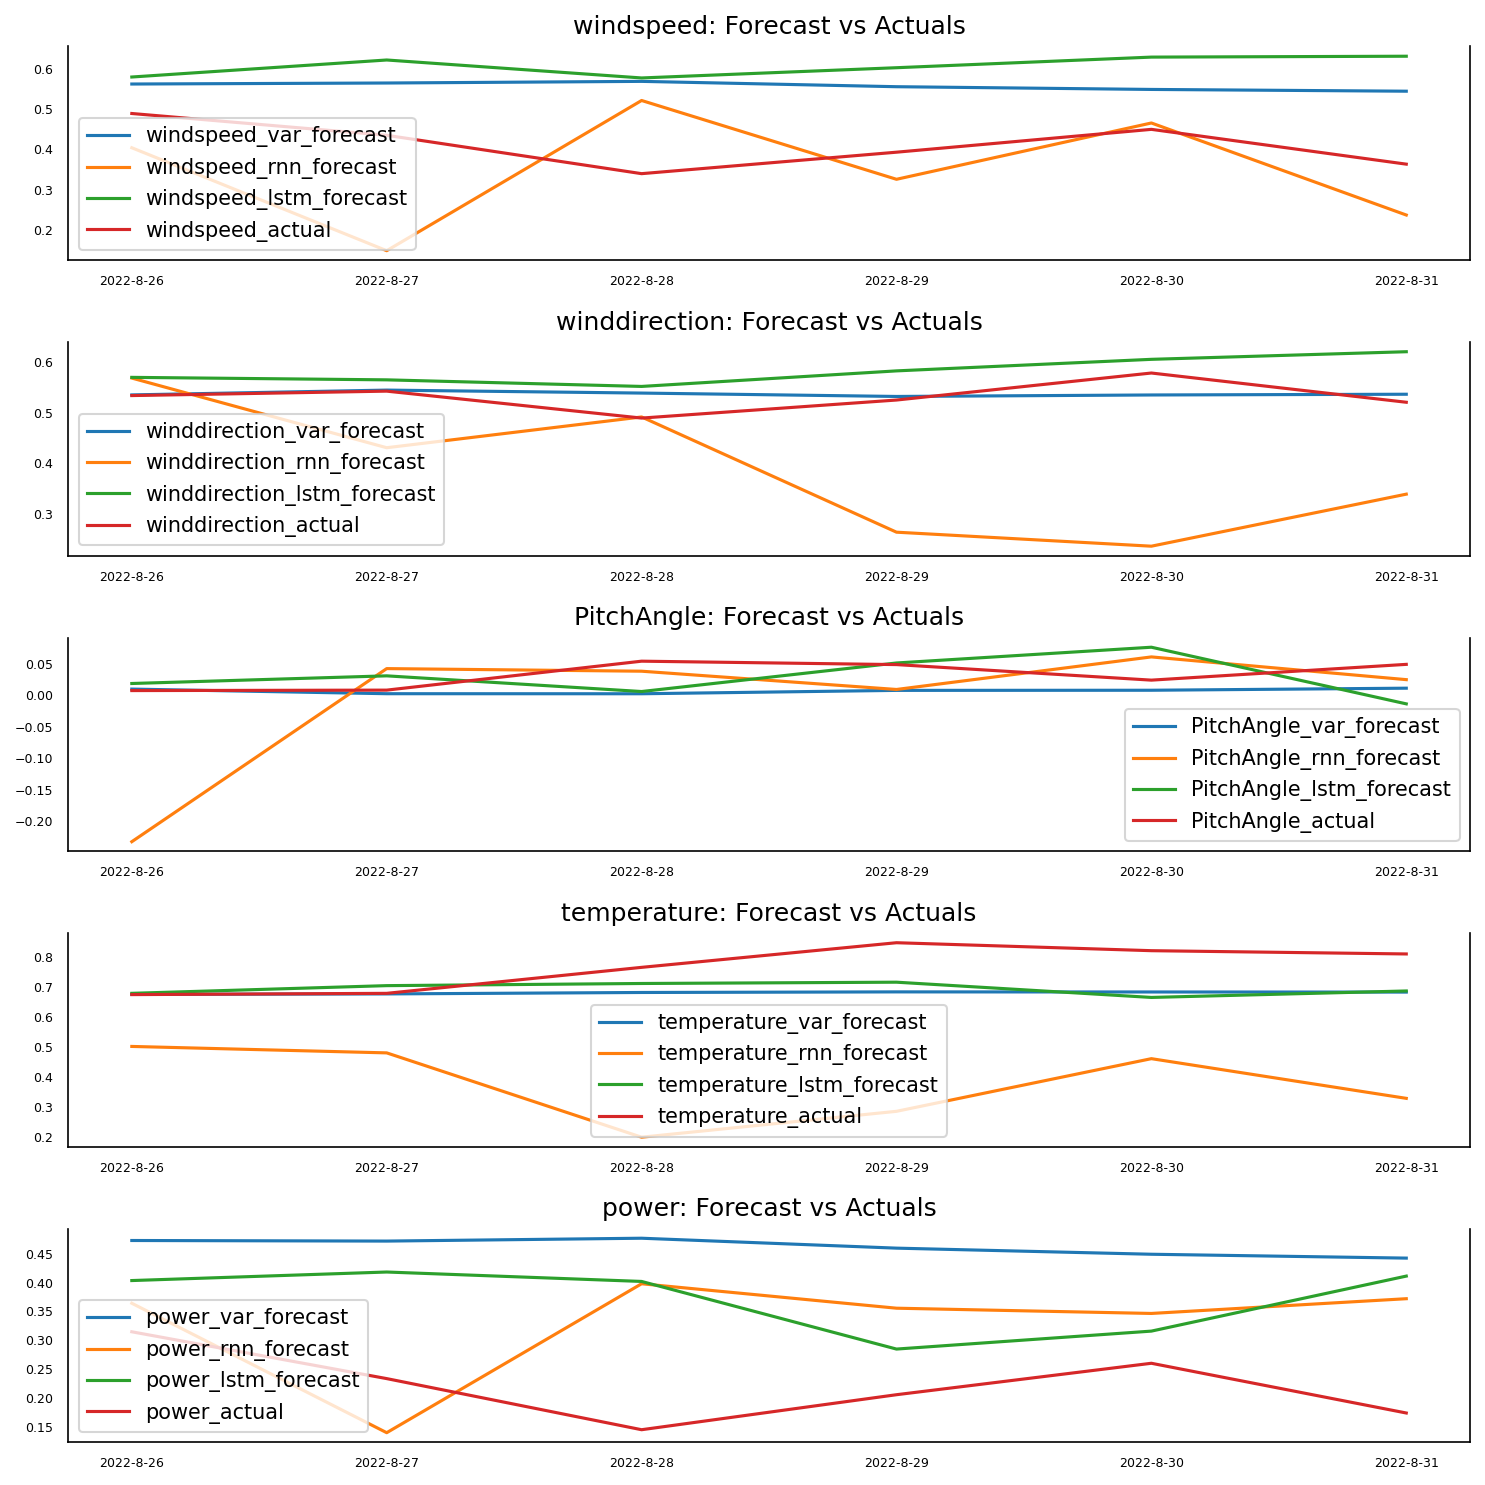

In [82]:
fig = plt.figure(dpi=150, figsize = (10, 10))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(5, 1, i+1)
    ax.plot(var_forecast[col+'_var_forecast'], label=col+'_var_forecast')
    ax.plot(rnn_forecast[col+'_rnn_forecast'], label=col+'_rnn_forecast')
    ax.plot(lstm_forecast[col+'_lstm_forecast'], label=col+'_lstm_forecast')
    ax.plot(test[col][-nobs:], label=col+'_actual')
    ax.set_title(col + ": Forecast vs Actuals")
    ax.legend(loc='best')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    
plt.tight_layout()

## MSE for different periods

In [67]:
mse_var = pd.DataFrame((test[-nobs:].values - var_forecast.values)**2, columns = ['mse_'+col for col in var_forecast.columns], index=test[-nobs:].index).mean(axis=1)
mse_rnn = pd.DataFrame((test[-nobs:].values - rnn_forecast.values)**2, columns = ['mse_'+col for col in rnn_forecast.columns], index=test[-nobs:].index).mean(axis=1)
mse_lstm = pd.DataFrame((test[-nobs:].values - lstm_forecast.values)**2, columns = ['mse_'+col for col in lstm_forecast.columns], index=test[-nobs:].index).mean(axis=1)

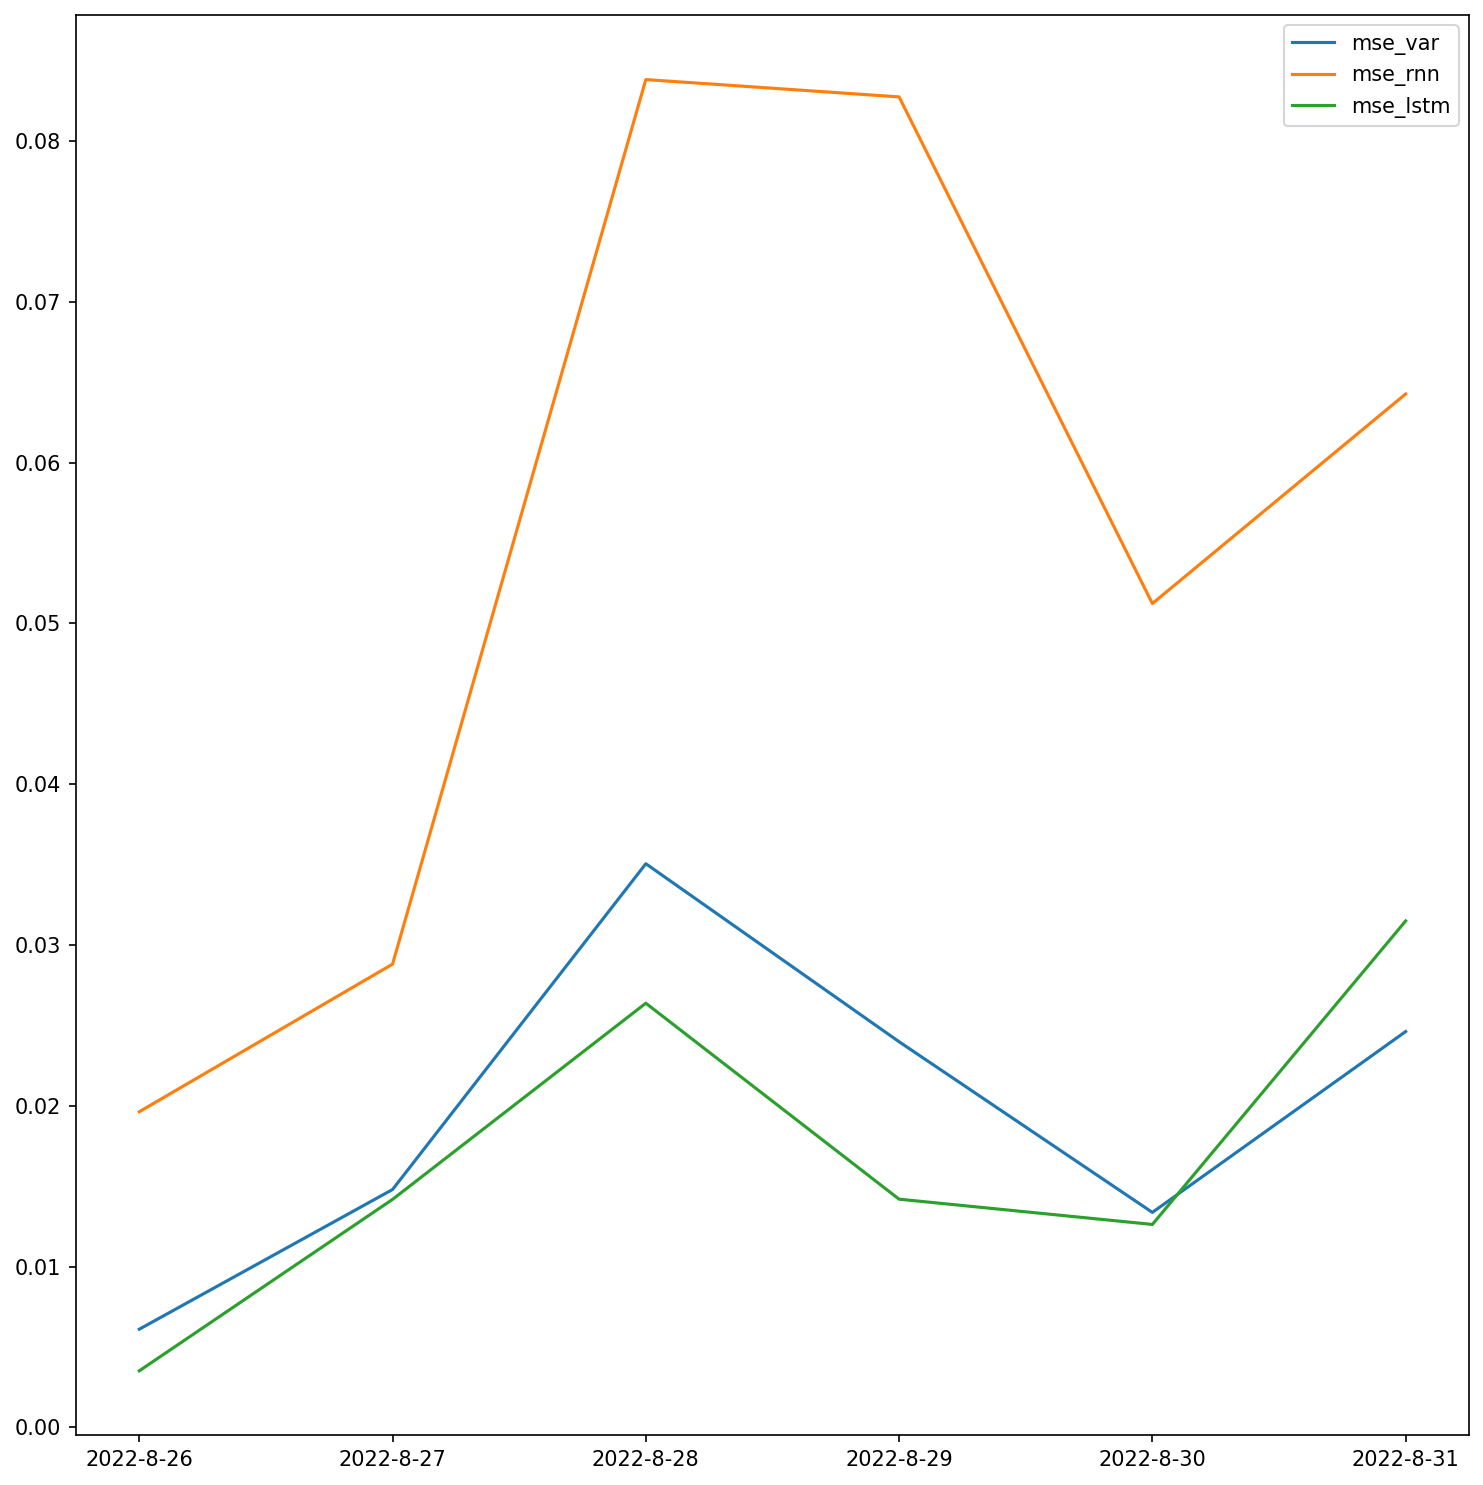

In [68]:
fig = plt.figure(dpi=150, figsize = (10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(mse_var, label='mse_var')
ax.plot(mse_rnn, label='mse_rnn')
ax.plot(mse_lstm, label='mse_lstm')
ax.legend(loc='best')

plt.tight_layout()